## Introduction
Hey everyone! In this project, we're going to go through an end-to-end machine learning project with the goal of predicting if the passenger will be transferred to an alternate dimension or not.

Since we're trying to predict a class (`True` or `False`), this kind of problem is known as a classification problem.

The data we'll use is here from a [Kaggle competition](https://www.kaggle.com/competitions/spaceship-titanic/overview) - Spaceship Titanic, Predict which passengers are transported to an alternate dimension.

## Background & Problem Statement (Copied from Kaggle)
Welcome to the year 2912, where your data science skills are needed to solve a cosmic mystery. We've received a transmission from four lightyears away and things aren't looking good.

The Spaceship Titanic was an interstellar passenger liner launched a month ago. With almost 13,000 passengers on board, the vessel set out on its maiden voyage transporting emigrants from our solar system to three newly habitable exoplanets orbiting nearby stars.

While rounding Alpha Centauri en route to its first destination—the torrid 55 Cancri E—the unwary Spaceship Titanic collided with a spacetime anomaly hidden within a dust cloud. Sadly, it met a similar fate as its namesake from 1000 years before. Though the ship stayed intact, almost half of the passengers were transported to an alternate dimension!

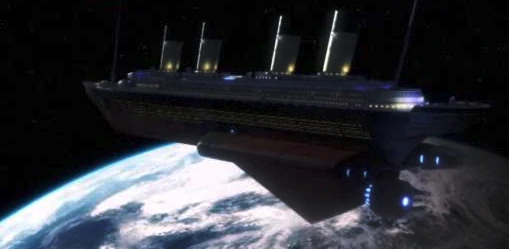

## Data

Looking at the [dataset from Kaggle](https://www.kaggle.com/competitions/spaceship-titanic/data).

There are 2 datasets:

* Train.csv - Personal records for about two-thirds (~8700) of the passengers, to be used as training data. The target variable is the `Transported` column
* Test.csv - Personal records for the remaining one-third (~4300) of the passengers, to be used as test data. Your task is to predict the value of `Transported` for the passengers in this set. 

## Evaluation

For this problem, [Kaggle has set the evaluation metric to being [classification accuracy](https://developers.google.com/machine-learning/crash-course/classification/accuracy) (Classification Accuracy)](https://www.kaggle.com/competitions/spaceship-titanic/overview/evaluation).

To see how well our model is doing, we'll make our predictions on the test set, create a DataFrame with the results and submit our DataFrame (After converting to CSV) to Kaggle and get out the result.

## My Plan

* Downloading a the dataset
* Doing some EDA
* Imputing and scaling numeric features
* Encoding categorical columns as one-hot vectors
* Training a logistic regression model using Scikit-learn
* Evaluating a model using our test set


In [2]:
# Import Libraries

# 1. Libraries for EDA
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px

print("Libraries Imported")

Libraries Imported


## Loading Data

In [4]:
train_df = pd.read_csv("train.csv")
test_df = pd.read_csv("test.csv")

print("Data Loaded Successfully")

Data Loaded Successfully


## Column Descriptions
`PassengerId` - A unique Id for each passenger. Each Id takes the form gggg_pp where gggg indicates a group the passenger is travelling with and pp is their number within the group. People in a group are often family members, but not always.

`HomePlanet` - The planet the passenger departed from, typically their planet of permanent residence.

`CryoSleep` - Indicates whether the passenger elected to be put into suspended animation for the duration of the voyage. Passengers in cryosleep are confined to their cabins.

`Cabin` - The cabin number where the passenger is staying. Takes the form deck/num/side, where side can be either P for Port or S for Starboard.

`Destination` - The planet the passenger will be debarking to.

`Age` - The age of the passenger.

`RoomService`, `FoodCourt`, `ShoppingMall`, `Spa`, `VRDeck` - Amount the passenger has billed at each of the Spaceship Titanic's many luxury amenities.

`VIP` - Whether the passenger has paid for special VIP service during the voyage.

RoomService, FoodCourt, ShoppingMall, Spa, VRDeck - Amount the passenger has billed at each of the Spaceship Titanic's many luxury amenities.

`Name` - The first and last names of the passenger.

`Transported` - Whether the passenger was transported to another dimension. This is the target, the column you are trying to predict.


In [5]:
# First 5 rows of dataset
train_df.head()

,PassengerId,HomePlanet,CryoSleep,Cabin,Destination,Age,VIP,RoomService,FoodCourt,ShoppingMall,Spa,VRDeck,Name,Transported
0,0001_01,Europa,False,B/0/P,TRAPPIST-1e,39.0,False,0.0,0.0,0.0,0.0,0.0,Maham Ofracculy,False
1,0002_01,Earth,False,F/0/S,TRAPPIST-1e,24.0,False,109.0,9.0,25.0,549.0,44.0,Juanna Vines,True
2,0003_01,Europa,False,A/0/S,TRAPPIST-1e,58.0,True,43.0,3576.0,0.0,6715.0,49.0,Altark Susent,False
3,0003_02,Europa,False,A/0/S,TRAPPIST-1e,33.0,False,0.0,1283.0,371.0,3329.0,193.0,Solam Susent,False
4,0004_01,Earth,False,F/1/S,TRAPPIST-1e,16.0,False,303.0,70.0,151.0,565.0,2.0,Willy Santantines,True


In [6]:
# Get some info on our dataset
train_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8693 entries, 0 to 8692
Data columns (total 14 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   PassengerId   8693 non-null   object 
 1   HomePlanet    8492 non-null   object 
 2   CryoSleep     8476 non-null   object 
 3   Cabin         8494 non-null   object 
 4   Destination   8511 non-null   object 
 5   Age           8514 non-null   float64
 6   VIP           8490 non-null   object 
 7   RoomService   8512 non-null   float64
 8   FoodCourt     8510 non-null   float64
 9   ShoppingMall  8485 non-null   float64
 10  Spa           8510 non-null   float64
 11  VRDeck        8505 non-null   float64
 12  Name          8493 non-null   object 
 13  Transported   8693 non-null   bool   
dtypes: bool(1), float64(6), object(7)
memory usage: 891.5+ KB


**Observation**
* There are a total of 8693 entries/data-points
* There are 14 columns, and 13 feature columns and one target variable `Transported`
* Our dataset has 3 datatypes
    * 6 Float Values
    * 7 Objects/String
    * 1 Bool (This is the target variable, we'll convert this to 0's & 1's)


In [17]:
# Some description of the numeric columns
train_df.describe()

,Age,RoomService,FoodCourt,ShoppingMall,Spa,VRDeck
count,8514.000000,8512.000000,8510.000000,8485.000000,8510.000000,8505.000000
mean,28.827930,224.687617,458.077203,173.729169,311.138778,304.854791
std,14.489021,666.717663,1611.489240,604.696458,1136.705535,1145.717189
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,19.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,27.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,38.000000,47.000000,76.000000,27.000000,59.000000,46.000000
max,79.000000,14327.000000,29813.000000,23492.000000,22408.000000,24133.000000


**Observation**

* Age Column
    * Ages start from 0 and go till 79
    * 75% poeple are less than the age of `38`
    
* RoomService, FoodCourt, ShoppingMall, Spa, VRDeck
    * The most poeple were billed at the FoodCourt
    * The cheapest luxury was the Room Service, which is pretty obvious why
    * These columns DON'T contradict with our common sense, so they are pretty good at they are
    
  

In [51]:
train_df.isna().sum()

PassengerId       0
HomePlanet      201
CryoSleep       217
Cabin           199
Destination     182
Age             179
VIP             203
RoomService     181
FoodCourt       183
ShoppingMall    208
Spa             183
VRDeck          188
Name            200
Transported       0
dtype: int64

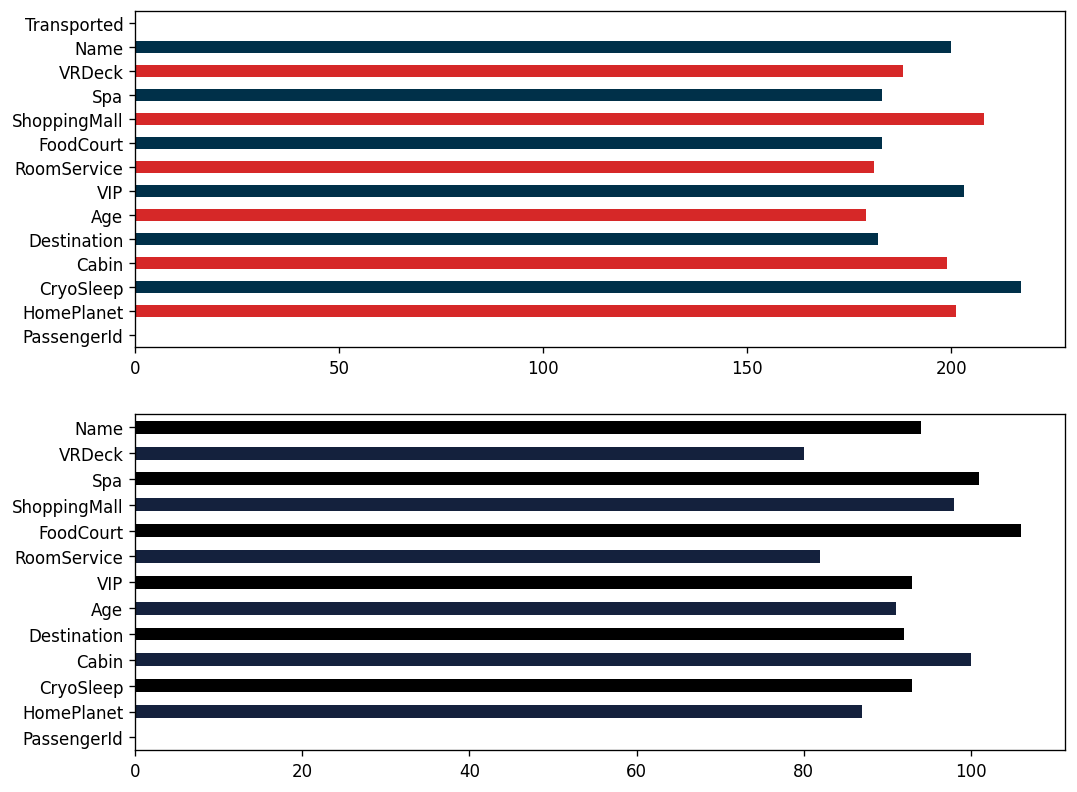

In [63]:
# Check for Null values
fig, ax = plt.subplots(2, 1, figsize=(10, 8), dpi=120)
train_df.isna().sum().plot(kind="barh", color=["#003049", "#d62828"], ax=ax[0]) # Train
test_df.isna().sum().plot(kind="barh", color=["#000000", "#14213d"], ax=ax[1])  # Test
plt.show()

## Doing Some EDA
* Exploring the numeric features (Histrograms)
* Exploring the categroical columns (Bar Charts, Scatter Plots)
* Getting a Scatter Matrix & plotting a HeatMap